In [2]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [3]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)


# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir("/content/drive/My Drive/dcu/future Learn_v2/MOOC 4 - CA683 - Feature engineering/M4 Colab Files/Data")
#!ls

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data 
print(x_train[0].shape)
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train= np.clip(x_train_noisy, 0., 1.)
x_test = np.clip(x_test_noisy, 0., 1.)


Using TensorFlow backend.
(28, 28, 1)


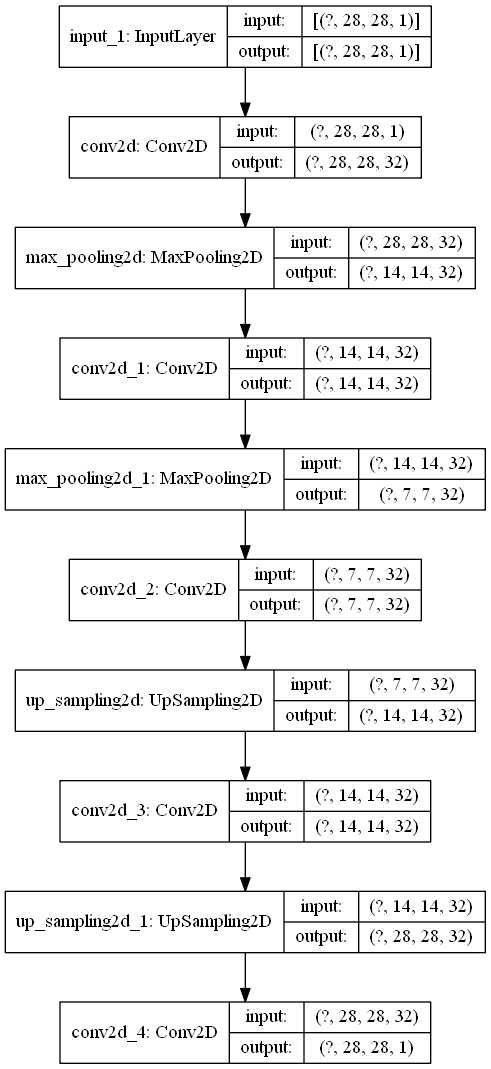

In [5]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils.vis_utils import plot_model

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adadelta', loss='binary_crossentropy',metrics = ['accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [6]:
model.fit(x_train, x_train,epochs=50, batch_size=128, shuffle=True)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 41s 684us/sample - loss: 0.6802 - accuracy: 0.4203
Epoch 2/50
60000/60000 [==============================] - 34s 574us/sample - loss: 0.6663 - accuracy: 0.4292
Epoch 3/50
56192/60000 [===========================>..] - ETA: 2s - loss: 0.6472 - accuracy: 0.4303

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils.vis_utils import plot_model

if K.image_data_format() == 'channels_first' :
  input_shape = (1, 28, 28)
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
else:
  input_shape = (28, 28, 1)
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_img = (28, 28, 1)  # adapt this if using `channels_first` image data format
print(input_shape)
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=input_img))
#model.add(MaxPooling2D((2, 2), padding='same'))
#model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add( MaxPooling2D((2, 2), padding='same'))

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
#model.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [ ]:
model.fit(x_train, x_train,verbose=1,epochs=150, batch_size=128,shuffle=True)

In [ ]:
decoded_imgs = model.predict(x_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()